## <center> Name Correction </center>
#### <center> Sophia Rawlings </center> <center> Taylor Sorensen </center> <center> Amy Eubanks </center><center> Josh Lapicola </center>
#### <center> December 2020 </center>

### Introduction
Handwriting recognition software can be used to quickly digitize historic records. However, this software can often make mistakes when transcribing the handwriting found therein. These errors are usually off by just a letter or two, but a human could easily recognize the misspelled name. Our goal is to use machine learning and historical context to recognize these mistakes and produce a corrected name.

Our data contains men from the 1930 census born before the year 1910. This data was obtained from familysearch.org. We also have data from BYU's record linking lab, who work with FamilySearch to auto index records using image segmentation and handwriting recognition. This is where we got the 1930 census name handwriting recognition output for the men in our dataset. Our question is, can we look at a name and accurately determine whether or not it is misspelled? We used what was on familysearch.org as the true spelling of the name and the handwriting recognition as the name that may be misspelled and only did this classification for the surnames in our data. 

### Feature Engineering
Our dataset has columns for ids for FamilySearch records, names, birthplaces, birth years, and the different options for the person’s name. We orginally thought that we didn't need feature engineering but as we worked more with out data we realized that we could do things such as n-grams

Upon working with the data we realized that there was some hidden whitespace. Nevertheless, that was an easy problem to solve. The more difficult problem had less to do with cleaning and more to do with feature engineering. This was where we spent most of our time.

Our most important feature is a simple string representing a first or last name. But, unless we wanted the model to memorize every single possible misspelling of a name, we needed to change that feature space. We began by simply turning the name into a vector of characters. This was not very effective. 

Note that there is a large class-imbalance - 75\% of instances are correctly labeled, and 15\% of instances are not accurate. Thus, if a model were to predict that it were correct every time, it would obtain 85\% accuracy. This is our baseline.

Our best model was a random forest with 87\% accuracy. We then tried one-hot-encoding this vector. The encoded vector was significantly larger, but from the same random forest model, we were able to get an accuracy of 91\%. An MLP was able to also obtain 91% accuracy.

Another way we decided to try feature engineering is to treat each word as a set of n-grams. For example, for a 1-gram, we count how many occurrences of “a” there are, then “b”, etc. For a 2-gram, we count the occurrences of “aa”, “ab”, …, “ci”, ... , “zz”, or all pairs of possible letters. We found that the 2-gram performed better than the 1-gram. However, a 3-gram may not be feasible, or be prone to overfitting, since the size of the vector grows exponentially (26 features for 1-gram, $26^2=676$ for 2-gram, $26^3=17576$ for a 3-gram, etc.)

Another post-processing idea that we had was to do Non-negative Matrix Factorization on the dataset of n-grams. The idea was, that the most common combinatinos of letters would be more commonly represented if they were correct, whereas if there were a transcription error, it would be off from the typical NMF representation. Thus, we perforrmed NMF on the correctly labeled training examples, and with that created a new group of features based on the NMF, and L2-distance between NMF representation and original representation.

We need to explore other ways to engineer and extract features from the data, as treating it simply as a bag of n-grams ignores some of the global structure and relationships.

### Initial Visualization of the Data
To get an idea of what our data looked like we decided to look at what the misspellings were like and what the majority of the names were like. We also wanted to get an idea of the context of the time and what the names would be. 

We found that a majority of the people were probably Caucasian based on what we found.

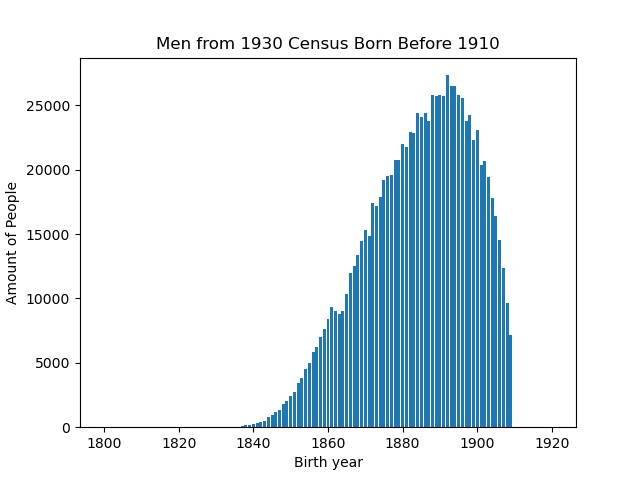
#### <center> Figure 1 </center>

For Figure 1 we dropped the cases when the birth year was equal to zero and when the birth year was greater than 1910 because the birth years should be within 1820-1910. This shows us that a lot of the men that were in the 1930 census were born between the years 1860 and 1910, so we should expect to see names that are common to those years.

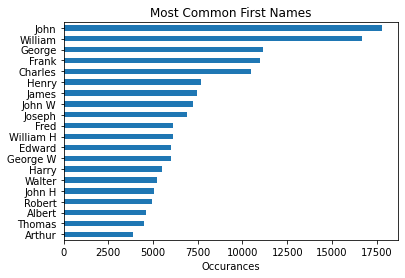
#### <center> Figure 2 </center>

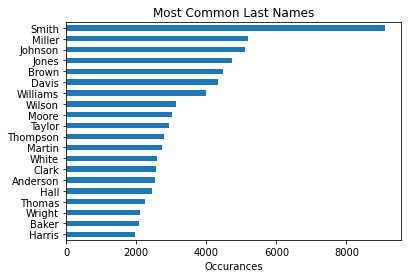
#### <center> Figure 3 </center>

Here, we show in Figures 2 and 3 the most common first and last names. Results are as you would expect - John as a first name and Smith as a surname are the most common names. Note that the names skew to common names of the era and especially ones you would find among white communities, as you would expect from this dataset. There are some other names found in the dataset that do not fit into these categories but, our algorithm may be more useful for older records rather compare to newer records, where trends have changed and diversity is more common.

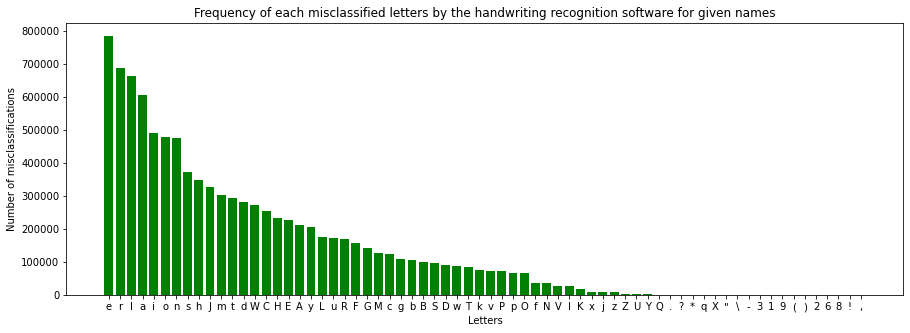
#### <center> Figure 4 </center>

To make Figure 4 we checked how many times each letter was misclassified for first names, using the FamilySearch indexed name as the truth and comparing it to the handwriting recognition name. As you may notice the letters that can be easily confused in cursive are misclassified the most. The letters e,r, and l were especially misclassified as each other.  Using the same process again, we also checked the frequency of misclassified letters for each surname, as show in Figure 5. As with given names, e and r are the most misclassified letters, but now n has moved up significantly.

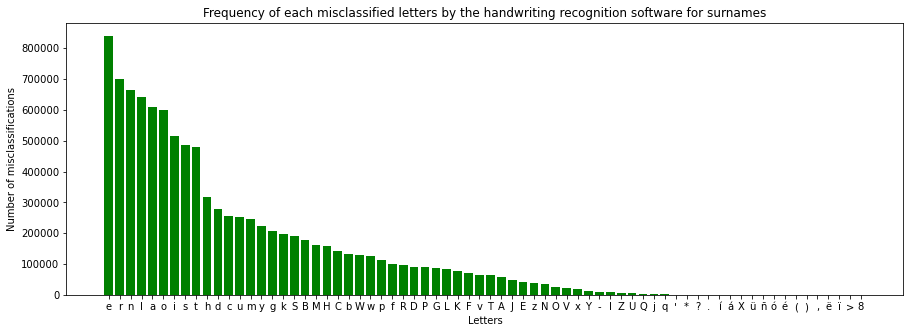
#### <center> Figure 5 </center>

In both of the graphs we observed that there are many extraneous characters in names that we didn’t notice before. Although these occurrences are unlikely, they are still enough to cause the handwriting recognition software to make mistakes.

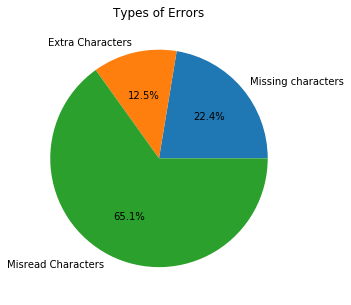
#### <center> Figure 6 </center>

We also compared the erroneous strings to find out what type of error was made, as shown in Figure 6. If extra characters were inserted, or if we are missing characters, then we no longer have a one-to-one correspondence between letters in names. These types of errors will probably require more effort to fix. Luckily, the majority of errors are such that a character has been replaced by another and every mistaken letter has a correct letter counterpart.

### Analysis
We started with a simple classification problem: Can we look at a name and accurately determine whether or not it is misspelled? In our data we found that the FamilySearch name and the handwriting recognition name matched 83.5\% of the time. So we would expect to see about a 85\% accuracy for our models. Out first step in solving the posed problem was to just use the data and encode it to see how well a model could classify the names. This problem also seemed feasible. We achieved moderate success with this task. After balancing the data 50/50 between correct and misclassifications, the Random Forest got 89\% accuracy. This is enough to sniff out a large number of mistakes, but still misses many of them.

Thus far we have tried logistic regression, classification trees, random forests, gradient boosting, XGboost, and a multi-layer perceptron (neural network).
Currently the random forest or MLP works best, but gradient boosting also showed reasonable results. We aren’t entirely sure why it gave good results but one reason could be the fact that splitting differently for each tree gives a better way for noticing mistakes in the spelling.The baseline for the training data had a percentage of 85\%. However, different feature engineering also greatly affected the outcome. So far, the best model we have is the Random Forest or MLP, which achieves a 91\% accuracy with a 2-gram feature extractor (or, with a balanced dataset, where 50\% is the baseline, it achieved 79\% accuracy).

We got similar accuracy with a random forest trained on a padded vector of letters with a one-hot encoding per letter per position.

When we did gradient boosting on our data we got an 88\% accuracy. For this we had a max depth of 5 and 20 estimators. We think this did as well as it did because our data is fairly complex and has many names, and so the opportunity for it to iteratively change as it learns could potentially help the model learn complicated data. 

Here we have a confusion matrix for the top performing model, an MLP.

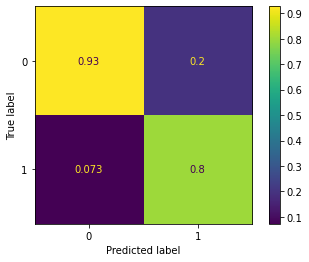

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test = np.load('y_test.npy')
y_pred = np.load('y_pred.npy')
conf = confusion_matrix(y_test, y_pred)
conf = conf * 1/conf.sum(axis=0)
ConfusionMatrixDisplay(conf).plot()

### Ethics
We got permission to use the data and the data we are working with won't harm anyone's privacy. The work we did could help improve the handwriting recognition model in BYU's record linking lab. This would then help auto index the historical records which would help FamilySearch. This is a project that would benefit the future of auto indexing. 

### Conclusion
As we can see, 